## Import Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston,load_iris

## Problem Statement

To predict the price by using various independent variables:
    
Dependent Variables:  Price
independent variables : 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                           'TAX', 'PTRATIO', 'B', 'LSTAT' 

## Data Gathering

In [5]:
boston = load_bostonn()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Exploratory Data Analysis (EDA)

In [23]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [24]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Feature Engineering

## Feature Selection

In [ ]:
# Assumption of Linear Regression
1. Linearity
2. No MultiColinearity (VIF) >> 1 to 5.
3. Noramlity of residual 
4. Homoscedacity.

In [16]:
# sns.pairplot(boston_df.corr())

<AxesSubplot:>

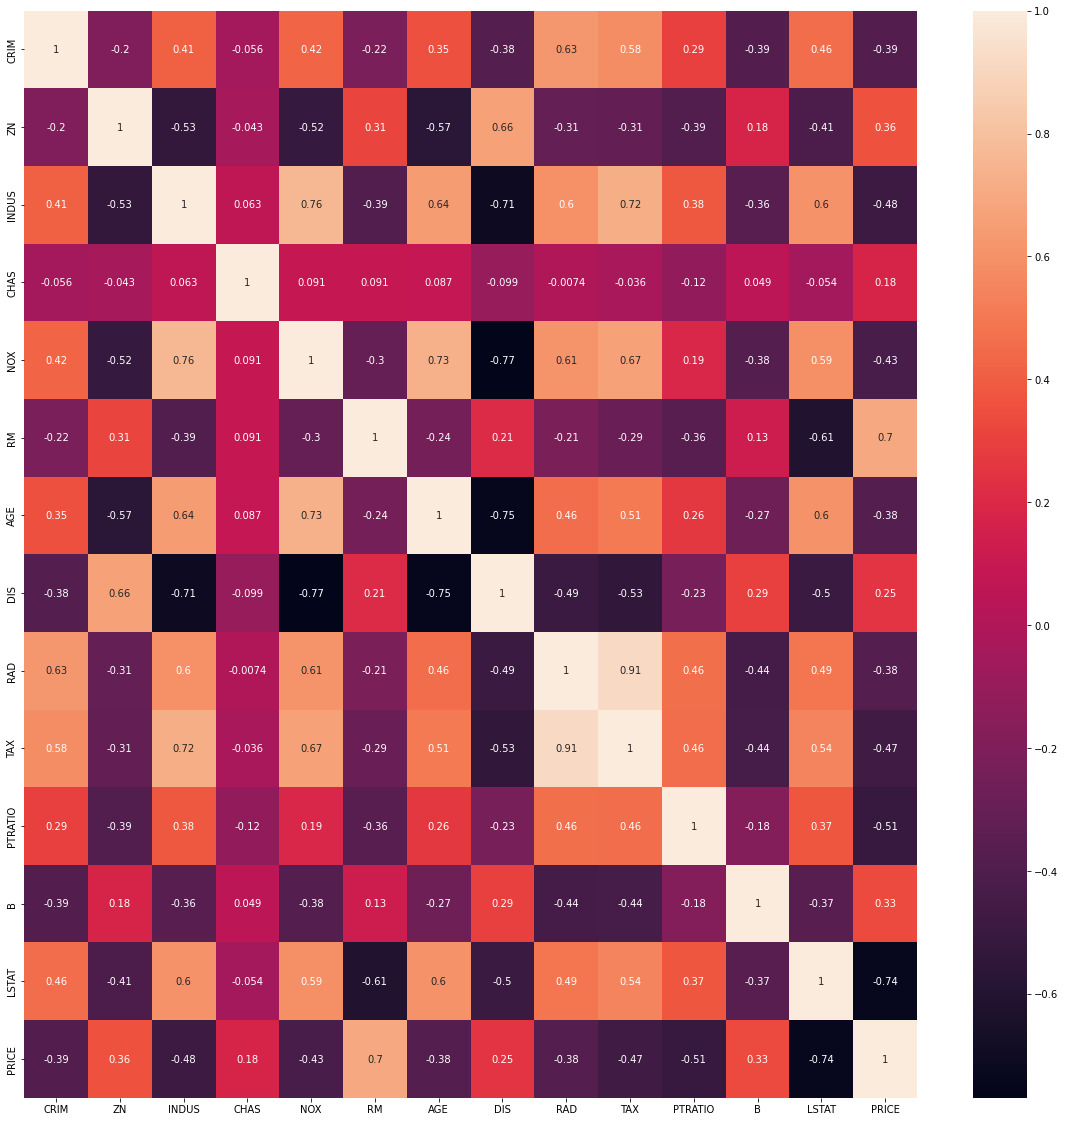

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(boston_df.corr(),annot = True)

## No Multicolinearity

In [9]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [26]:
df1 = boston_df.drop("PRICE",axis = 1)
df1.shape[1]

13

<AxesSubplot:>

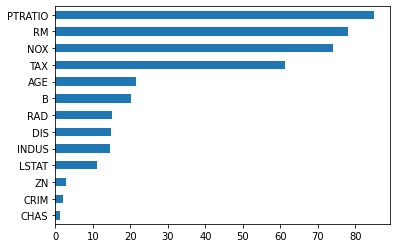

In [27]:
vif_list = []
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(), i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index=df1.columns)
s1.sort_values().plot(kind = 'barh')

In [12]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Train Test Split

In [30]:
x = boston_df.drop('PRICE',axis = 1)
y = boston_df['PRICE']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0,shuffle = True)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [15]:
y_train

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: PRICE, Length: 404, dtype: float64

In [16]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: PRICE, Length: 102, dtype: float64

In [17]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4.0,277.0,18.6,385.81,9.38


In [18]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: PRICE, Length: 102, dtype: float64

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Model Training

In [110]:
# Instantiating Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train) # Gradient Descent >> best m and c values.

LinearRegression()

# Model Evaluation

In [21]:
## Model Evaluation on Testing Data

y_pred = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

r2 = linear_reg_model.score(x_test, y_test) # Without Predict Function
print("R2 :",r2)

adj_r2 = 1 - (((1-r_squared_value) * (x_test.shape[0] - 1))/(x_test.shape[0]- x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)



Mean Squared Error : 33.44897999767653
Root Mean Squared Error : 5.783509315085135
Mean Absolute Error : 3.842909220444499
R Squared Value : 0.5892223849182507
R2 : 0.5892223849182507
Adjusted R-Squared Value : 0.5285393281448105


In [22]:
## Model Evaluation on Training Data

y_pred_train = linear_reg_model.predict(x_train) # 404 rows

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1-r_squared_value) * (x_train.shape[0] - 1))/(x_train.shape[0]- x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

r2 = linear_reg_model.score(x_train, y_train)
print("R2 :",r2)

Mean Squared Error : 19.326470203585725
Root Mean Squared Error : 4.396188144698282
Mean Absolute Error : 3.1031563965794278
R Squared Value : 0.7730135569264234
Adjusted R-Squared Value : 0.7654473421573041
R2 : 0.7730135569264234


# R-Squared Values

In [37]:
r2_list = []
adj_r2_list = []
for i in range(1, boston_df.shape[1]):
    x = boston_df.iloc[:,:i]
    model = LinearRegression()
    model.fit(x,y)
    r2 = model.score(x,y) # coef. of determination
    r2_list.append(r2)
    
    adj_r2 = 1 - (((1-r2) * (x.shape[0] - 1))/(x.shape[0]- x.shape[1] - 1))
    adj_r2_list.append(adj_r2)
    
result_df = pd.DataFrame()
result_df['Columns'] = x.columns
result_df['R2 Values'] = r2_list
result_df['Adj R2 Values'] = adj_r2_list

result_df

,Columns,R2 Values,Adj R2 Values
0,CRIM,0.150780,0.149096
1,ZN,0.233988,0.230943
2,INDUS,0.293714,0.289493
3,CHAS,0.329528,0.324175
4,NOX,0.331313,0.324626
5,RM,0.587377,0.582416
6,AGE,0.589490,0.583720
7,DIS,0.631149,0.625212
8,RAD,0.631948,0.625269
9,TAX,0.639663,0.632383


# Assumption of Linear Regression

In [ ]:
1. Linearity
2. No Multicolinearity
3. Normality of Residual
4. Homoscedasticity

# Normality of Residual

In [ ]:
Residuals should be normally distributed

1. kdeplot
2. Hypothesis Testing:
    1. Shapiro
    2. KsTest
    3. normaltest
    
3. QQ-Plot
4. Skewness of Residual  (skew = 0 >> Data is normally distributed)

In [ ]:
Residual >> Ya - Yp

In [32]:
Residual = y_train - y_pred_train
Residual

220   -5.856927
71    -0.227095
240   -5.543826
6     -0.703188
417    3.828090
         ...   
323   -0.994951
192    3.073636
117   -4.596208
47    -1.858353
172   -0.149181
Name: PRICE, Length: 404, dtype: float64

### 1. kdeplot

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

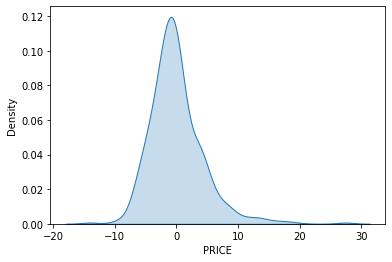

In [33]:
sns.kdeplot(Residual,fill= True)

In [1]:
sns.distplot(Residual)

NameError: name 'sns' is not defined

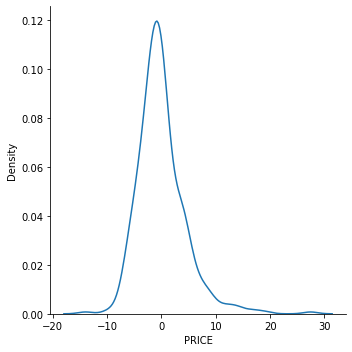

In [114]:
sns.displot(Residual,kind="kde")

In [55]:
# boston_df

<AxesSubplot:xlabel='AGE', ylabel='Density'>

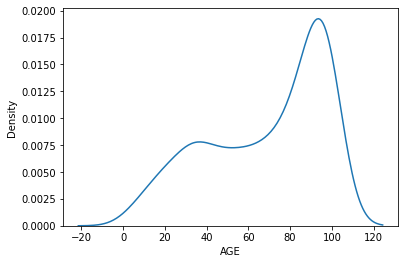

In [38]:
sns.kdeplot(boston_df['AGE'])

# Skewness

In [ ]:
Positive SKewness >> Tail of distribution is longer towards right hand side
Negative Skewness >> Tail of distribution is longer towards left hand side
Symmetrical data 

-0.5 to +0.5 >> Symmetrical Distribution (-0.4, 0, 0.1,0.3)
-1 to -0.5 >> Negatively Skewed Distribution (-0.7,-0.90)
skew < -1  >> Highly Negatively skewed Distribution(-1.1,-1.4,-1.15)

+0.5 to 1.0 >> Positively SKewed distribution  (+0.6, +0.8)
skew > +1  >> Highly Positively skewed Distribution(+1.1,+1.4,+1.15)

In [ ]:
68.574901 # Mean
77.500000 # Median
100.0 # Mode

<AxesSubplot:xlabel='AGE', ylabel='Density'>

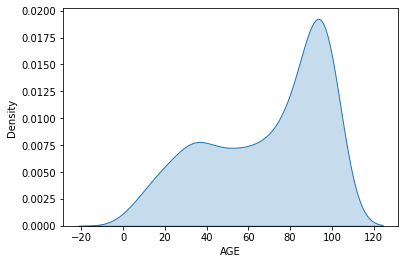

In [56]:
sns.kdeplot(boston_df['AGE'],fill=True)

In [45]:
mean = boston_df['AGE'].mean()
print("Mean is :",mean)

median = boston_df['AGE'].median()
print("median is :",median)

mode = boston_df['AGE'].mode()[0]
print("mode is :",mode)

skew = boston_df['AGE'].skew()
print("SKewnes of data is :",skew)

Mean is : 68.57490118577076
median is : 77.5
mode is : 100.0
SKewnes of data is : -0.5989626398812962


<AxesSubplot:xlabel='NOX', ylabel='Density'>

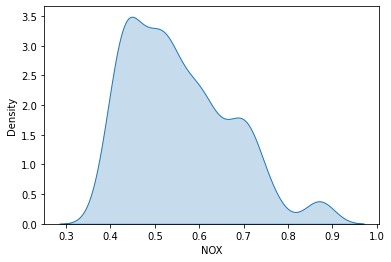

In [58]:
sns.kdeplot(boston_df['NOX'],fill=True)

In [59]:
mean = boston_df['NOX'].mean()
print("Mean is :",mean)

median = boston_df['NOX'].median()
print("median is :",median)

mode = boston_df['NOX'].mode()[0]
print("mode is :",mode)

skew = boston_df['NOX'].skew()
print("SKewnes of data is :",skew)

Mean is : 0.5546950592885376
median is : 0.538
mode is : 0.538
SKewnes of data is : 0.7293079225348787


In [46]:
from scipy.stats import skew

In [47]:
skewness = skew(boston_df['AGE'])
print("SKewnes of data is :",skewness)

SKewnes of data is : -0.5971855948016143


In [51]:
Residual.mean()

-2.770061407975638e-16

In [53]:
Residual.median()

-0.49679123132989833

In [54]:
Residual.mode()[0]

-13.98524905235766

In [48]:
skewness = skew(Residual)
print("SKewnes of data is :",skewness)

SKewnes of data is : 1.4696164031530146


# 2. Hypothesis Testing

In [ ]:
Null Hypothesis >> Data is Normally Distributed
Alternate Hypothesis >> Data is not normally distributed

p_val Range >> 0 to 1
0.05  is Significant value in Hypothesis Testing

p_val >= 0.05    >> We are accepting NULL hypothesis
p_Val < 0.05     >> We are accepting Alternate Hypothesis

p_val >= 0.05    >> NULL hypothesis is True
p_Val < 0.05     >> NULL hypothesis is False / Alternate Hypothesis is True

In [ ]:
1. Shapiro 
2. kstest
3. normaltest

### 2.1 Shapiro

In [61]:
from scipy.stats import shapiro

In [66]:
_ , p_val = shapiro(Residual)
print('P value : ',p_val)

if p_val >= 0.05:
    print("Null Hypothesis is TRUE")
    print("Data is Normally Distributed")
    
else :
    print("Alternate Hypothesis is TRUE")
    print("Data is not Normally Distributed")
    

P value :  1.0301506284289552e-14
Alternate Hypothesis is TRUE
Data is not Normally Distributed


In [71]:
array = np.random.randn(1000) # Normally distributed array

In [72]:
_ , p_val = shapiro(array)
print('P value : ',p_val)

if p_val >= 0.05:
    print("Null Hypothesis is TRUE")
    print("Data is Normally Distributed")

else :
    print("Alternate Hypothesis is TRUE")
    print("Data is not Normally Distributed")
    

P value :  0.09151580929756165
Null Hypothesis is TRUE
Data is Normally Distributed


### 2. kstest

In [ ]:
Kolmogorov-Smirnov test

In [73]:
from scipy.stats import kstest

In [74]:
_ , p_val = kstest(Residual,'norm')
print('P value : ',p_val)

if p_val >= 0.05:
    print("Null Hypothesis is TRUE")
    print("Data is Normally Distributed")
    
else :
    print("Alternate Hypothesis is TRUE")
    print("Data is not Normally Distributed")

P value :  5.546138441188948e-38
Alternate Hypothesis is TRUE
Data is not Normally Distributed


In [75]:
array = np.random.randn(1000)
_ , p_val = kstest(array,'norm')
print('P value : ',p_val)

if p_val >= 0.05:
    print("Null Hypothesis is TRUE")
    print("Data is Normally Distributed")
    
else :
    print("Alternate Hypothesis is TRUE")
    print("Data is not Normally Distributed")
    

P value :  0.47181105029065606
Null Hypothesis is TRUE
Data is Normally Distributed


# 3. normaltest

In [77]:
from scipy.stats import normaltest

In [79]:
_ , p_val = normaltest(Residual)
print('P value : ',p_val)

if p_val >= 0.05:
    print("Null Hypothesis is TRUE")
    print("Data is Normally Distributed")
    
else :
    print("Alternate Hypothesis is TRUE")
    print("Data is not Normally Distributed")
    

P value :  1.8837511067331464e-31
Alternate Hypothesis is TRUE
Data is not Normally Distributed


In [81]:
array = np.random.randn(1000)
_ , p_val = normaltest(array)
print('P value : ',p_val)

if p_val >= 0.05:
    print("Null Hypothesis is TRUE")
    print("Data is Normally Distributed")
    
else :
    print("Alternate Hypothesis is TRUE")
    print("Data is not Normally Distributed")
    

P value :  0.620692855483779
Null Hypothesis is TRUE
Data is Normally Distributed


## QQ-Plot

In [88]:
# import scipy.stats as sts
import statsmodels.api as sm

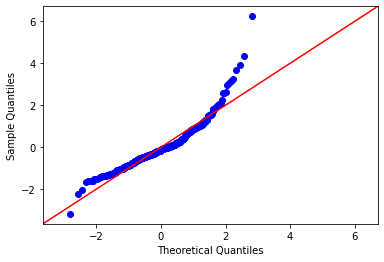

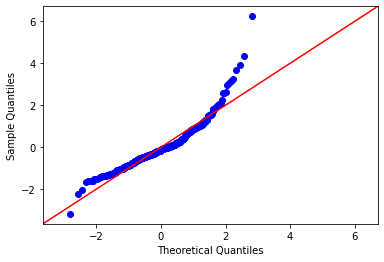

In [85]:
sm.qqplot(Residual,line= '45',fit=True)

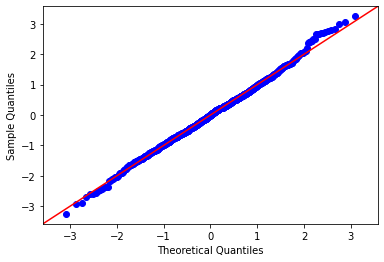

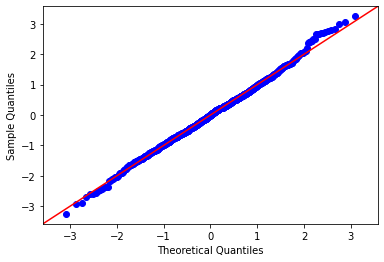

In [86]:
array = np.random.randn(1000)
sm.qqplot(array,line= '45',fit=True)

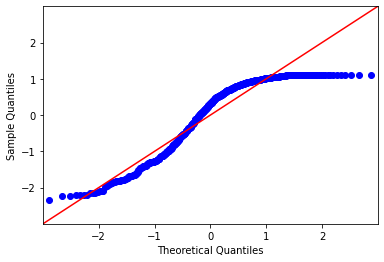

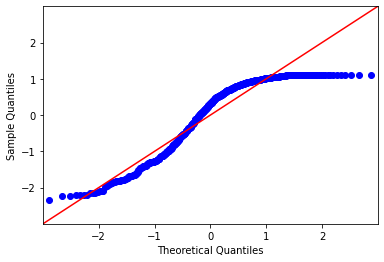

In [87]:
array = np.random.randn(1000)
sm.qqplot(boston_df["AGE"],line= '45',fit=True)

# 4. HomoScedasticity

In [ ]:
1. Assumption of Equal Variance
2. HomoScedasticity >> Constant Error
3. Constant Error >> Constant Deviation from Zero Line
4. Dependent Variable vs Residual

<AxesSubplot:xlabel='PRICE', ylabel='PRICE'>

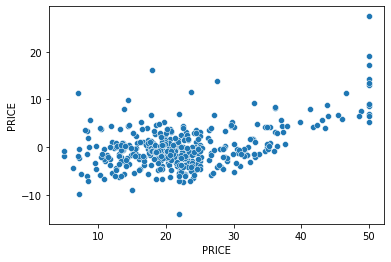

In [92]:
sns.scatterplot(x = y_train, y = Residual)

## Testing on User Inputs

In [ ]:
Single Row

In [100]:
x_test.head(1) # 2D Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


In [101]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### import pickle

with open('linear_model.pkl','wb') as f:
    pickle.dump(linear_reg_model,f)

In [116]:
CRIM = 0.07724
ZN = 0.0
INDUS = 2.78
CHAS = 0.0
NOX = 0.45
RM = 6.456789
AGE = 19.4
DIS =  6.1146
RAD =  4.0
TAX =  450.0
PTRATIO   =   16.5
B  =  388.21
LSTAT =  7.56

test_array = np.array([CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT],ndmin = 2)

def get_predicted_price(test_array):
    pred_price = linear_reg_model.predict(test_array)[0]
    pred_price = np.around(pred_price,2)
    
    return pred_price

pred_price = get_predicted_price(test _array)
print(f"Predicted PRICE is {pred_price}$")

Predicted PRICE is 24.45$
